# 1. Подготовка и первичная обработка

In [168]:
import pandas as pd
import numpy as np

# Загрузка данных
df = pd.read_csv("./data/marketing_AB.csv")

In [169]:
# 1. Анализ структуры данных
print("Первые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nСтатистика по числовым столбцам:")
print(df.describe())

Первые 5 строк:
   Unnamed: 0  user id test group  converted  total ads most ads day  \
0           0  1069124         ad      False        130       Monday   
1           1  1119715         ad      False         93      Tuesday   
2           2  1144181         ad      False         21      Tuesday   
3           3  1435133         ad      False        355      Tuesday   
4           4  1015700         ad      False        276       Friday   

   most ads hour  
0             20  
1             22  
2             18  
3             10  
4             14  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int6

In [170]:
# 2. Преобразование типов данных
# Преобразование 'test group' в категориальный тип
df['test group'] = df['test group'].astype('category')

In [171]:
# 3. Проверка уникальности user_id
if df['user id'].nunique() == len(df):
    print("\nВсе user_id уникальны")
else:
    print("\nОбнаружены дубликаты user_id")


Все user_id уникальны


In [172]:
# 4. Удаление пропусков (если они есть)
if any(df.isna().sum().to_list()):
    df = df.dropna()
    print("\nПропуски удалены")
else:
    print("\nПропусков нет")


Пропусков нет


In [173]:
# 5. Проверка пользователей в обеих группах
# Группировка по user_id и подсчет уникальных значений в test_group
users_in_both_groups = df.groupby('user id')['test group'].nunique() > 1
users_to_remove = users_in_both_groups[users_in_both_groups].index

if not users_to_remove.empty:
    print(f"\nНайдено {len(users_to_remove)} пользователей в обеих группах:")
    print(users_to_remove.tolist())
    # Удаление таких пользователей
    df = df[~df['user id'].isin(users_to_remove)]
    print("\nПользователи в обеих группах удалены")
else:
    print("\nПользователей в обеих группах не найдено")



Пользователей в обеих группах не найдено


In [174]:
# 6. Итог
df.to_csv("./data/marketing_AB_cleaned.csv", index=False)

# Итоговая информация о данных
print("\nИтоговая информация о данных:")
print(df.info())
print("\nРаспределение групп:")
print(df['test group'].value_counts())


Итоговая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Unnamed: 0     588101 non-null  int64   
 1   user id        588101 non-null  int64   
 2   test group     588101 non-null  category
 3   converted      588101 non-null  bool    
 4   total ads      588101 non-null  int64   
 5   most ads day   588101 non-null  object  
 6   most ads hour  588101 non-null  int64   
dtypes: bool(1), category(1), int64(4), object(1)
memory usage: 23.6+ MB
None

Распределение групп:
test group
ad     564577
psa     23524
Name: count, dtype: int64


# 2 Первичный анализ

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
# 1. Расчёт вспомогательных метрик
# Группировка по 'test group'
grouped = df.groupby('test group').agg(
    users=('user id', 'count'),
    purchases=('converted', 'sum'),
    avg_ads=('total ads', 'mean')
).reset_index()

# Расчёт конверсии
grouped['conversion_rate'] = grouped['purchases'] / grouped['users']

print("Метрики по группам:")
print(grouped)

Метрики по группам:
  test group   users  purchases    avg_ads  conversion_rate
0         ad  564577      14423  24.823365         0.025547
1        psa   23524        420  24.761138         0.017854


/var/folders/57/kcjkgrt57m13wnf0__qcxmbm0000gn/T/ipykernel_89243/1090455522.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('test group').agg(


/var/folders/57/kcjkgrt57m13wnf0__qcxmbm0000gn/T/ipykernel_89243/2992087252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test group', y='users', data=grouped, palette='viridis')


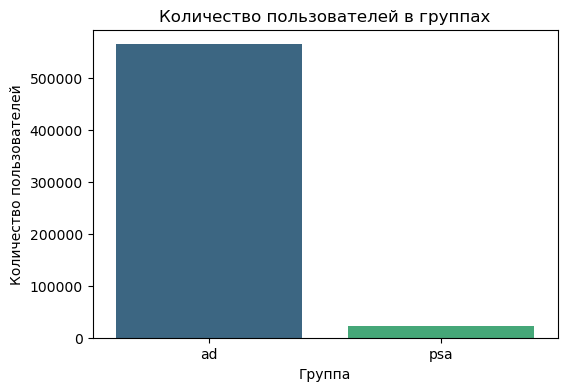

In [177]:
# 2. Оценка сбалансированности выборок
plt.figure(figsize=(6, 4))
sns.barplot(x='test group', y='users', data=grouped, palette='viridis')
plt.title('Количество пользователей в группах')
plt.ylabel('Количество пользователей')
plt.xlabel('Группа')
plt.show()

Очевидно, что выборки крайне несбалансированы

/var/folders/57/kcjkgrt57m13wnf0__qcxmbm0000gn/T/ipykernel_89243/3368810875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test group', y='conversion_rate', data=grouped, palette='coolwarm')


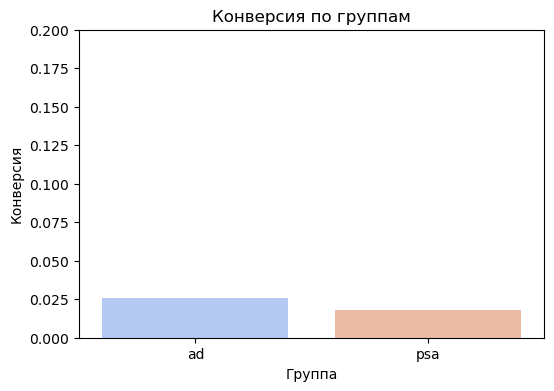

In [178]:
# 3. Визуализация конверсии
plt.figure(figsize=(6, 4))
sns.barplot(x='test group', y='conversion_rate', data=grouped, palette='coolwarm')
plt.title('Конверсия по группам')
plt.ylabel('Конверсия')
plt.xlabel('Группа')
plt.ylim(0, 0.2)
plt.show()

/var/folders/57/kcjkgrt57m13wnf0__qcxmbm0000gn/T/ipykernel_89243/2306113251.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test group', y='avg_ads', data=grouped, palette='coolwarm')


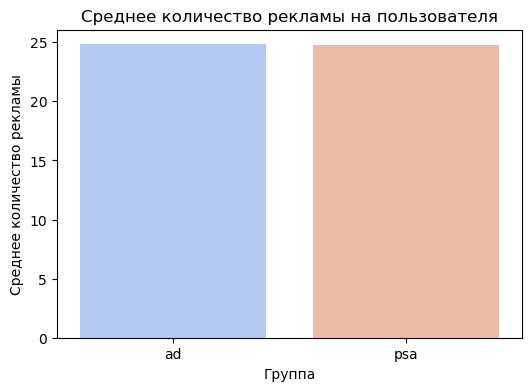

In [179]:
# 4. Визуализация среднего количества рекламы
plt.figure(figsize=(6, 4))
sns.barplot(x='test group', y='avg_ads', data=grouped, palette='coolwarm')
plt.title('Среднее количество рекламы на пользователя')
plt.ylabel('Среднее количество рекламы')
plt.xlabel('Группа')
plt.show()

/var/folders/57/kcjkgrt57m13wnf0__qcxmbm0000gn/T/ipykernel_89243/2499313045.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='most ads day', data=ad_group, ax=axes[0], palette='coolwarm')
/var/folders/57/kcjkgrt57m13wnf0__qcxmbm0000gn/T/ipykernel_89243/2499313045.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='most ads day', data=psa_group, ax=axes[1], palette='coolwarm')


Text(0.5, 1.0, 'Распределение наибольшего количества рекламы в группе PSA')

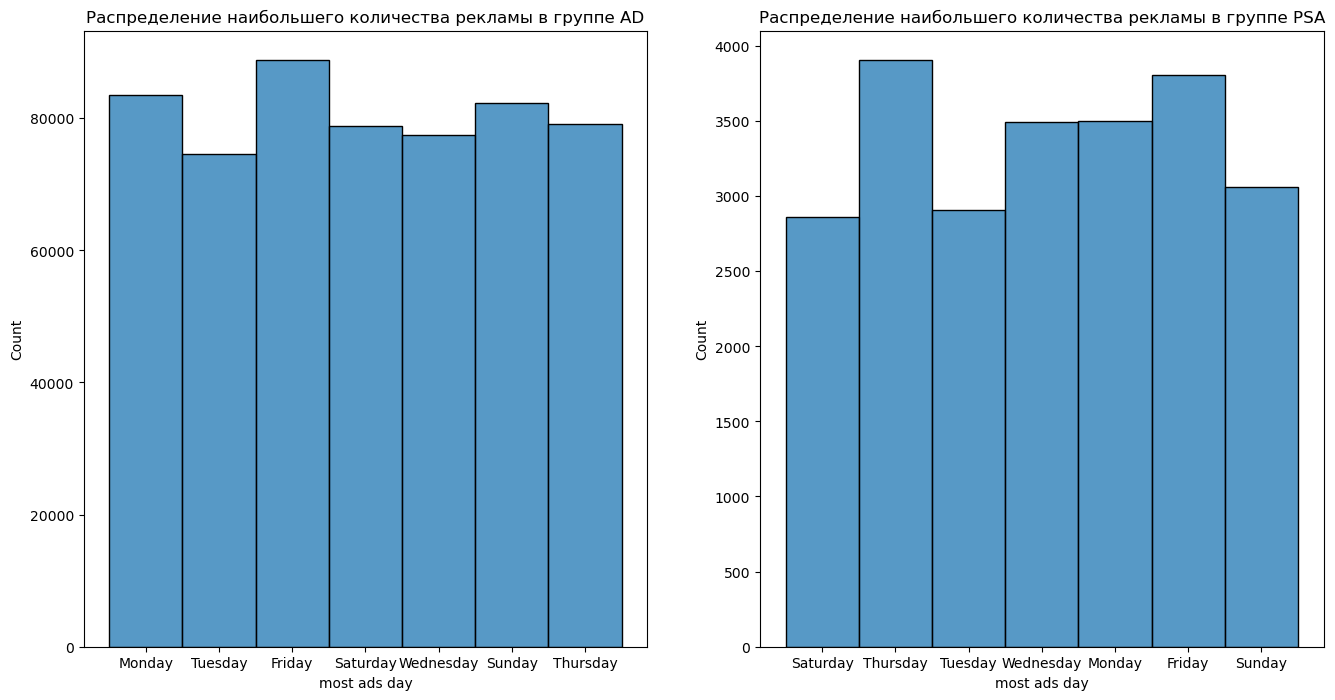

In [180]:
# 5. Приведём распределенмя рекламы по группам по дням недели
ad_group = df[df['test group'] == 'ad']
psa_group = df[df['test group'] == 'psa']

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
# строим гистограмму для наибольшего количества рекламы по дням недели в каждой группе
sns.histplot(x='most ads day', data=ad_group, ax=axes[0], palette='coolwarm')
sns.histplot(x='most ads day', data=psa_group, ax=axes[1], palette='coolwarm')
# задаём названия графикам
axes[0].set_title('Распределение наибольшего количества рекламы в группе AD')
axes[1].set_title('Распределение наибольшего количества рекламы в группе PSA')

/var/folders/57/kcjkgrt57m13wnf0__qcxmbm0000gn/T/ipykernel_89243/338529562.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='most ads hour', data=ad_group, ax=axes[0], palette='coolwarm')
/var/folders/57/kcjkgrt57m13wnf0__qcxmbm0000gn/T/ipykernel_89243/338529562.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='most ads hour', data=psa_group, ax=axes[1], palette='coolwarm')


Text(0.5, 1.0, 'Распределение наибольшего количества рекламы в группе PSA')

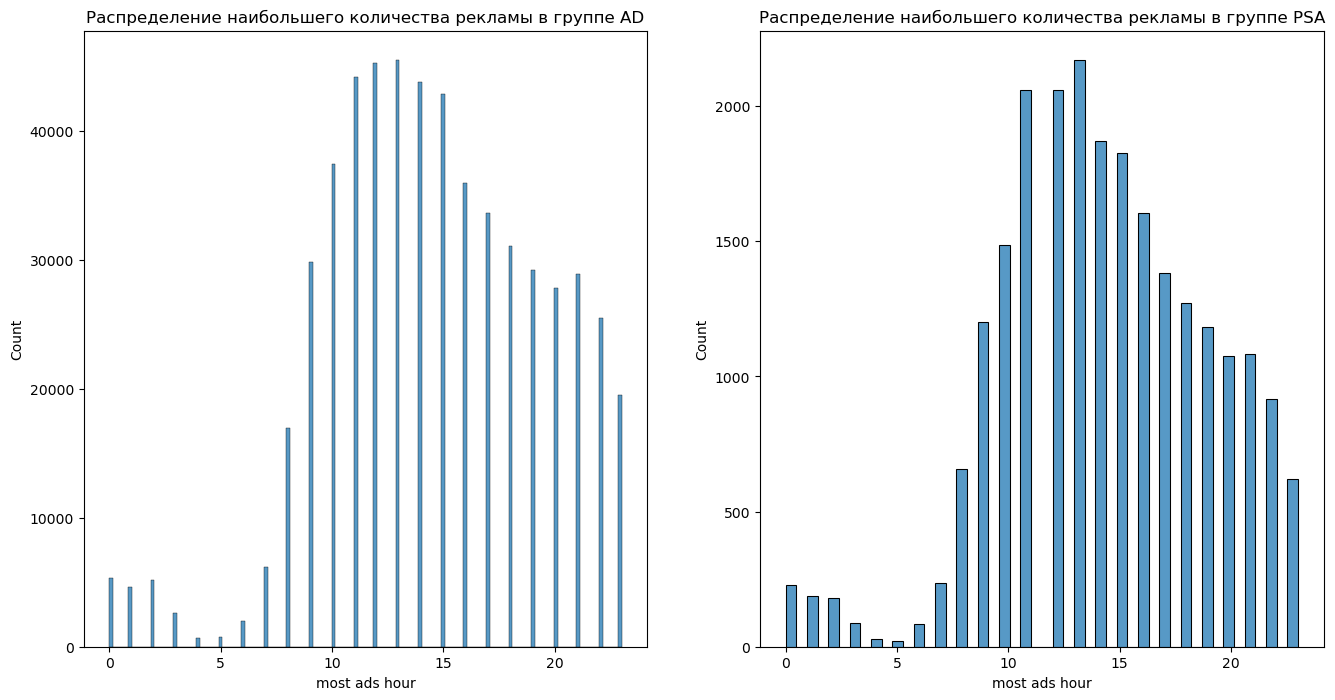

In [181]:
# 5. Приведём распределенмя рекламы по группам по часам

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.histplot(x='most ads hour', data=ad_group, ax=axes[0], palette='coolwarm')
sns.histplot(x='most ads hour', data=psa_group, ax=axes[1], palette='coolwarm')

axes[0].set_title('Распределение наибольшего количества рекламы в группе AD')
axes[1].set_title('Распределение наибольшего количества рекламы в группе PSA')

**Промежуточные выводы:**
1. Группы несбалансированы.
2. Конверсия в группе 'ad' выше, чем в 'psa' ~ на 0.8%.
3. Среднее количество рекламы в групппах идентично.
4. На первый взгляд, реклама положительно влияет на конверсию.

# 3 Статистические тесты

In [182]:
import scipy.stats as stats
import numpy as np

# 1. Z-тест для конверсии
# Пропорции и размеры выборок
success_ad = ad_group['converted'].sum()
success_psa = psa_group['converted'].sum()
n_ad = len(ad_group)
n_psa = len(psa_group)

# Общая пропорция
p_total = (success_ad + success_psa) / (n_ad + n_psa)

# Стандартная ошибка
se = np.sqrt(p_total * (1 - p_total) * (1/n_ad + 1/n_psa))

# Z-статистика
z = (success_ad/n_ad - success_psa/n_psa) / se

# p-value
p_z = 2 * stats.norm.sf(abs(z))

print(f"Z-тест для конверсии: z={z:.2f}, p-value={p_z:.4f}")

Z-тест для конверсии: z=7.37, p-value=0.0000


**Вывод :**
- p-value < 0.05, следовательно, отклоняем нулевую гипотезу.
- Конверсия в группе "ad" статистически значимо выше , чем в группе "psa".
- Реклама существенно повышает вероятность покупки.

In [183]:
# 2. T-тест для total_ads
# Проверка нормальности (тест Шапиро-Уилка)
def check_normality(data, group_name):
    stat, p = stats.shapiro(data)
    print(f"Тест Шапиро-Уилка для {group_name}: p-value={p:.4f}")
    return p > 0.05

ad_ads = ad_group['total ads']
psa_ads = psa_group['total ads']

In [184]:
# T-тест или U-test в зависимости от нормальности

is_ad_normal = check_normality(ad_ads, "ad")
is_psa_normal = check_normality(psa_ads, "psa")


if is_ad_normal and is_psa_normal:
    t_stat, p_t = stats.ttest_ind(ad_ads, psa_ads)
    print(f"T-тест для total_ads: t={t_stat:.2f}, p-value={p_t:.4f}")
else:
    u_stat, p_u = stats.mannwhitneyu(ad_ads, psa_ads)
    print(f"U-тест Манна-Уитни для total_ads: U={u_stat:.2f}, p-value={p_u:.4f}")

Тест Шапиро-Уилка для ad: p-value=0.0000
Тест Шапиро-Уилка для psa: p-value=0.0000
U-тест Манна-Уитни для total_ads: U=6808288222.00, p-value=0.0000


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 564577.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23524.
  res = hypotest_fun_out(*samples, **kwds)


**Вывод:**
- p-value < 0.05 → Отклоняем H₀.
- Среднее количество рекламы в группах статистически значимо различается.
- Однако разница мала: 24.82 vs 24.76 (разница +0.06 просмотров ).
- При больших выборках даже незначительные различия могут быть статистически значимыми, следовательно, необходимо оценить практическую значимость.

**Интерпретация результатов**

**Конверсия:**
- Реклама увеличивает конверсию на 42% относительно контрольной группы (2.55% vs 1.79%).
- Разница статистически значима (p < 0.001).
- Это указывает на эффективность рекламы.

**Количество рекламы:**
- Среднее количество рекламы в группах отличается статистически , но разница минимальна (+0.06 просмотров).
- Вероятно, это не влияет на конверсию, так как разница слишком мала для практического эффекта.

**Общий вывод:**
- Реклама значительно повышает конверсию , и это не связано с частотой показов (разница в просмотрах рекламы пренебрежимо мала).

# 4 Доверительные интервалы

In [185]:
import statsmodels.stats.proportion as smprop
import numpy as np

# 1. Доверительный интервал для конверсии в группе "ad"
ci_ad = smprop.proportion_confint(
    count=ad_group['converted'].sum(),
    nobs=len(ad_group),
    alpha=0.05,
    method='wilson'
)

print(f"Доверительный интервал для конверсии (ad): {ci_ad}")

Доверительный интервал для конверсии (ad): (0.02513821650599992, 0.025961359215123686)


In [186]:
# 2. Доверительный интервал для конверсии в группе "psa"
ci_psa = smprop.proportion_confint(
    count=psa_group['converted'].sum(),
    nobs=len(psa_group),
    alpha=0.05,
    method='wilson'
)

print(f"Доверительный интервал для конверсии (psa): {ci_psa}")

Доверительный интервал для конверсии (psa): (0.016238943989596074, 0.019626711612411318)


**Вывод:**
- Интервалы не перекрываются, следовательно, разница в конверсии статистически значима.
- Реклама увеличивает конверсию с 95% уверенностью.

In [187]:
# 3. Доверительный интервал для разницы конверсий
diff = (ad_group['converted'].mean() - psa_group['converted'].mean())
se_diff = np.sqrt(
    (ad_group['converted'].mean() * (1 - ad_group['converted'].mean()) / len(ad_group)) +
    (psa_group['converted'].mean() * (1 - psa_group['converted'].mean()) / len(psa_group))
)
ci_diff = (diff - 1.96 * se_diff, diff + 1.96 * se_diff)

print(f"Доверительный интервал для разницы конверсий: {ci_diff}")

Доверительный интервал для разницы конверсий: (0.00595090043017032, 0.009434005954232714)


**Вывод:**
- Интервал не включает 0, следовательно, реклама достоверно повышает конверсию .
- Минимальный прирост конверсии: +0.6% , максимальный: +0.94% .

In [188]:
# 4. Доверительный интервал для среднего количества рекламы (bootstrap)
def bootstrap_mean(data, n_bootstrap=1000):
    means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        means.append(np.mean(sample))
    return np.percentile(means, [2.5, 97.5])

In [189]:
ci_ads_ad = bootstrap_mean(ad_group['total ads'])
ci_ads_psa = bootstrap_mean(psa_group['total ads'])

print(f"Доверительный интервал для среднего количества рекламы (ad): {ci_ads_ad}")
print(f"Доверительный интервал для среднего количества рекламы (psa): {ci_ads_psa}")

Доверительный интервал для среднего количества рекламы (ad): [24.71142408 24.93969808]
Доверительный интервал для среднего количества рекламы (psa): [24.2401643 25.3189296]


**Вывод:**
- Интервалы частично перекрываются → статистически значимая, но практически незначимая разница .
- Разница в 0.06 просмотров не влияет на результаты теста .

# Ответы на бизнес-вопросы

1. **Будет ли кампания успешной?**

- Да, кампания успешна:
    - Конверсия в группе "ad" на 42% выше , чем в контрольной группе.
    - Разница статистически значима (p < 0.001).
    - Минимальный прирост конверсии: +0.6%.

2. **Насколько успех обусловлен рекламой?**

- Реклама является ключевым фактором успеха :
    - Разница в количестве рекламы между группами минимальна (+0.06 просмотров).
    - Это исключает влияние частоты показов на результаты.
    - Эффект конверсии обусловлен именно рекламой , а не просто увеличением активности пользователей.